## Algoritmo BFS (Busca em Largura)
O **BFS** é um algoritmo de busca cega que explora o grafo nível por nível, garantindo que encontre a solução com o menor número de passos. Características:
- **Completo**: sempre encontra uma solução se ela existir
- **Ótimo**: para grafos não ponderados, encontra a solução com menor número de passos

In [19]:
# Importação das bibliotecas necessárias
import networkx as nx        # Para manipulação de grafos
from collections import deque  # Para implementar a fila FIFO
import time                  # Para medição de tempo
import matplotlib.pyplot as plt  # Para visualização
import os                    # Para manipulação de diretórios

In [20]:
def busca_bfs(grafo, estado_inicial, estado_objetivo, limite_nos=10000):
    """
    Implementação do algoritmo BFS (Busca em Largura).
    
    Args:
        grafo (nx.Graph): Grafo a ser explorado
        estado_inicial (str): Estado inicial da busca
        estado_objetivo (str): Estado objetivo a ser alcançado
        limite_nos (int): Limite máximo de nós a serem visitados
    
    Returns:
        tuple: (caminho, conjunto_visitados, arestas_exploradas) ou (None, conjunto_visitados, arestas_exploradas) se não encontrar
    """
    # Fila FIFO para manter a ordem de exploração por níveis
    fila_exploracao = deque([(estado_inicial, [estado_inicial])])
    nos_visitados = set()
    arestas_exploradas = []  # Lista para rastrear arestas exploradas

    while fila_exploracao:
        estado_atual, caminho = fila_exploracao.popleft()

        # Evita processar nós já visitados
        if estado_atual in nos_visitados:
            continue
        nos_visitados.add(estado_atual)

        # Verifica se alcançou o objetivo
        if estado_atual == estado_objetivo:
            return caminho, nos_visitados, arestas_exploradas

        # Proteção contra explosão combinatorial
        if len(nos_visitados) > limite_nos:
            print(f"Limite de {limite_nos} nós atingido.")
            break

        # Expande os vizinhos do estado atual
        for vizinho in grafo.neighbors(estado_atual):
            if vizinho not in nos_visitados:
                # Registra a aresta explorada
                arestas_exploradas.append((estado_atual, vizinho))
                fila_exploracao.append((vizinho, caminho + [vizinho]))

    return None, nos_visitados, arestas_exploradas

In [21]:
# Carregamento do grafo e definição dos estados
grafo = nx.read_graphml("grafo_ponte_tocha.graphml")

# Estados inicial e objetivo
estado_inicial = "inicio=ABCD|tocha=inicio"
estado_objetivo = "inicio=VAZIO|tocha=final"

In [22]:
# Execução do algoritmo BFS
tempo_inicio = time.time()
caminho, nos_visitados, arestas_exploradas = busca_bfs(grafo, estado_inicial, estado_objetivo)
tempo_fim = time.time()
duracao = tempo_fim - tempo_inicio

In [23]:
# Exibição dos resultados
print("=== Resultados da Busca BFS ===")
print(f"Caminho encontrado: {caminho}")
print(f"Número de passos: {len(caminho) - 1}")
print(f"Número de nós visitados: {len(nos_visitados)}")
print(f"Tempo de execução: {duracao:.6f} segundos")

# Análise do caminho encontrado
if caminho:
    print(f"\n=== Análise do Caminho ===")
    for i, estado in enumerate(caminho):
        print(f"Passo {i}: {estado}")

=== Resultados da Busca BFS ===
Caminho encontrado: ['inicio=ABCD|tocha=inicio', 'inicio=AB|tocha=final', 'inicio=ABD|tocha=inicio', 'inicio=B|tocha=final', 'inicio=BD|tocha=inicio', 'inicio=VAZIO|tocha=final']
Número de passos: 5
Número de nós visitados: 22
Tempo de execução: 0.000320 segundos

=== Análise do Caminho ===
Passo 0: inicio=ABCD|tocha=inicio
Passo 1: inicio=AB|tocha=final
Passo 2: inicio=ABD|tocha=inicio
Passo 3: inicio=B|tocha=final
Passo 4: inicio=BD|tocha=inicio
Passo 5: inicio=VAZIO|tocha=final


Imagem da exploração BFS salva em: imagens/bfs_exploracao.png


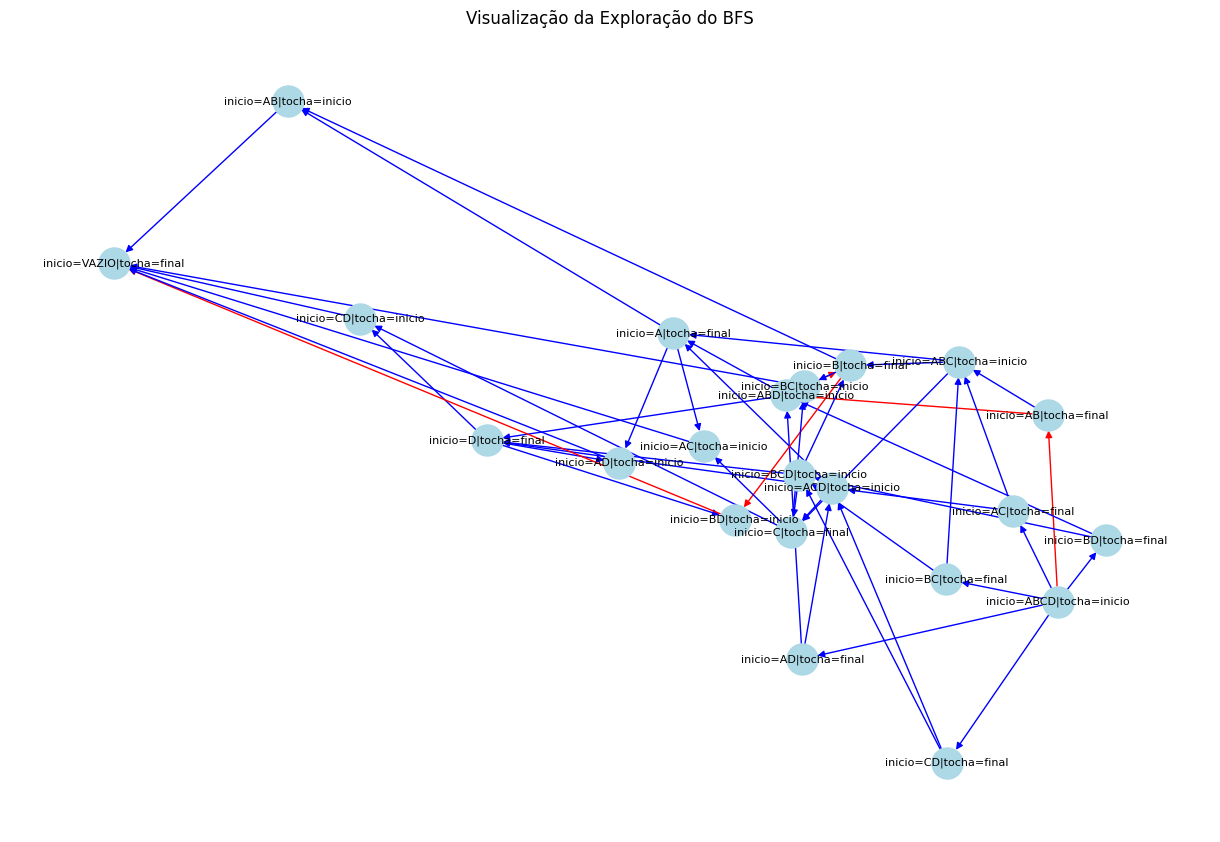

In [24]:
def visualizar_exploracao_bfs(grafo, arestas_exploradas, caminho_final, salvar_imagem=True):
    """
    Visualiza o grafo destacando as arestas exploradas e o caminho final encontrado pelo BFS.
    
    Args:
        grafo (nx.Graph): Grafo a ser visualizado
        arestas_exploradas (list): Lista de arestas exploradas durante a busca
        caminho_final (list): Sequência de nós do caminho encontrado
        salvar_imagem (bool): Se True, salva a imagem em arquivo
    """
    cores_arestas = []
    arestas_caminho = set(zip(caminho_final, caminho_final[1:])) if caminho_final else set()

    # Define cores das arestas baseado no tipo
    for origem, destino in grafo.edges():
        if (origem, destino) in arestas_caminho:
            cores_arestas.append("red")      # Caminho final em vermelho
        elif (origem, destino) in arestas_exploradas or (destino, origem) in arestas_exploradas:
            cores_arestas.append("blue")     # Arestas exploradas em cinza
        else:
            cores_arestas.append("gray") # Outras arestas em cinza claro

    # Cria o layout e desenha o grafo
    posicoes = nx.spring_layout(grafo, seed=42)
    plt.figure(figsize=(12, 8))
    nx.draw(
        grafo, 
        posicoes, 
        with_labels=True, 
        node_size=500,
        node_color="lightblue", 
        edge_color=cores_arestas, 
        arrows=True,
        font_size=8
    )
    
    plt.title("Visualização da Exploração do BFS")
    
    # Salva a imagem se solicitado
    if salvar_imagem:
        if not os.path.exists('imagens'):
            os.makedirs('imagens')
        plt.savefig('imagens/bfs_exploracao.png', dpi=300, bbox_inches='tight')
        print("Imagem da exploração BFS salva em: imagens/bfs_exploracao.png")
    
    plt.show()

# Visualiza o resultado
if caminho:
    visualizar_exploracao_bfs(grafo, arestas_exploradas, caminho, salvar_imagem=True)